In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
folder_path = "/content/drive/MyDrive/UMich/"

In [5]:
os.path.exists(folder_path)
df = pd.read_csv(folder_path + "final_dfSI670.csv")

<ipython-input-5-3c84cf4670b8>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder_path + "final_dfSI670.csv")


In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,cert_num,name,address,city,state,zip5,beds,payer,...,code_disambiguator,BCBS,Medicare,Medicaid,UHC,Aetna,Cigna,Cash Price,Gross Charge,HospitalInsurance
0,251,251,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,...,NONE,0,0,0,0,0,0,1,0,0
1,252,252,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,...,NONE,0,0,0,0,0,0,0,1,0
2,253,253,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,...,NONE,0,0,0,0,0,0,1,0,0
3,254,254,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,...,NONE,0,0,0,0,0,0,0,1,0
4,404,404,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,...,NONE,0,0,0,0,0,0,1,0,0


In [7]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'code_disambiguator', "code", "units"])
df.columns

Index(['cert_num', 'name', 'address', 'city', 'state', 'zip5', 'beds', 'payer',
       'internal_revenue_code', 'description', 'inpatient_outpatient', 'price',
       'BCBS', 'Medicare', 'Medicaid', 'UHC', 'Aetna', 'Cigna', 'Cash Price',
       'Gross Charge', 'HospitalInsurance'],
      dtype='object')

In [8]:
df.head()

,cert_num,name,address,city,state,zip5,beds,payer,internal_revenue_code,description,...,price,BCBS,Medicare,Medicaid,UHC,Aetna,Cigna,Cash Price,Gross Charge,HospitalInsurance
0,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,NONE,Removal of Pilonidal Cyst,...,14266.79,0,0,0,0,0,0,1,0,0
1,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,NONE,Removal of Pilonidal Cyst,...,21948.91,0,0,0,0,0,0,0,1,0
2,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,NONE,Removal of Pilonidal Cyst,...,14266.79,0,0,0,0,0,0,1,0,0
3,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,NONE,Removal of Pilonidal Cyst,...,21948.91,0,0,0,0,0,0,0,1,0
4,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,NONE,Removal of Breast Growth Requiring Incision,...,15849.42,0,0,0,0,0,0,1,0,0


In [9]:
len(df["description"].unique())

3377

In [10]:
desc_clusters = pd.read_csv(folder_path + "df_description_clustering.csv")
desc_clusters.head()

,description,birch_cluster
0,Lab Test - Identification of DNA from 22 Patho...,62682
1,ROOM & BOARD - PRIVATE MEDICAL & SURGICAL,67343
2,ROOM & BOARD - PRIVATE OBSTETRICAL,54333
3,ROOM & BOARD - PRIVATE HOSPICE,67343
4,ROOM & BOARD - SEMI-PRIVATE MEDICAL & SURGICAL,67343


In [11]:
gross_df = df[df["payer"] == "GROSS CHARGE"][["cert_num", "description", "price"]].drop_duplicates()
gross_df.rename(columns={"price": "gross_price"}, inplace=True)
gross_df = pd.merge(gross_df, desc_clusters, on="description", how="inner")
gross_df.head()

,cert_num,description,gross_price,birch_cluster
0,230005,Removal of Pilonidal Cyst,21948.91,70134
1,230005,Removal of Breast Growth Requiring Incision,24383.73,70079
2,230005,"Removal of Bone Implant (Screw, Wire, Pin, Nail)",24132.75,54
3,230005,Repair of Shoulder Rotator Cuff,30462.49,70941
4,230005,Amputation Of Foot Or Toes,41709.26,66777


In [12]:
cash_df = df[df["payer"] == "CASH PRICE"][["cert_num", "description", "price"]].drop_duplicates()
cash_df.rename(columns={"price": "cash_price"}, inplace=True)
cash_df = pd.merge(cash_df, desc_clusters, on="description", how="inner")
cash_df.head()

,cert_num,description,cash_price,birch_cluster
0,230005,Removal of Pilonidal Cyst,14266.79,70134
1,230005,Removal of Breast Growth Requiring Incision,15849.42,70079
2,230005,"Removal of Bone Implant (Screw, Wire, Pin, Nail)",15686.29,54
3,230005,Repair of Shoulder Rotator Cuff,19800.62,70941
4,230005,Amputation Of Foot Or Toes,27111.02,66777


In [13]:
census_df = pd.read_csv(folder_path + "michigan_zipcode_data.csv")
census_df.head()
census_df.rename(columns={"ZIP_Code": "zip5"}, inplace=True)

In [14]:
df_census_merged  = pd.merge(df, census_df, on = 'zip5', how = 'inner')
df_census_merged.head()

,cert_num,name,address,city,state,zip5,beds,payer,internal_revenue_code,description,...,Percentage_Over_65,Unemployment_Rate,Poverty_Rate,HS_rate,Bachelors_rate,Graduate_rate,With_Health_Insurance_Rate,Without_Health_Insurance_Rate,Labor_Force_Rate,Below_Poverty_Rate
0,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,NONE,Removal of Pilonidal Cyst,...,17.94,5.14,17.61,21.56,7.08,0.32,21.85,0.89,44.42,17.61
1,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,NONE,Removal of Pilonidal Cyst,...,17.94,5.14,17.61,21.56,7.08,0.32,21.85,0.89,44.42,17.61
2,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,NONE,Removal of Pilonidal Cyst,...,17.94,5.14,17.61,21.56,7.08,0.32,21.85,0.89,44.42,17.61
3,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,NONE,Removal of Pilonidal Cyst,...,17.94,5.14,17.61,21.56,7.08,0.32,21.85,0.89,44.42,17.61
4,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,NONE,Removal of Breast Growth Requiring Incision,...,17.94,5.14,17.61,21.56,7.08,0.32,21.85,0.89,44.42,17.61


In [24]:
df_census_merged.to_csv(folder_path + "final_dfSI670_census.csv")

In [15]:
df.shape

(659784, 21)

In [16]:
df_census_merged.shape

(659784, 32)

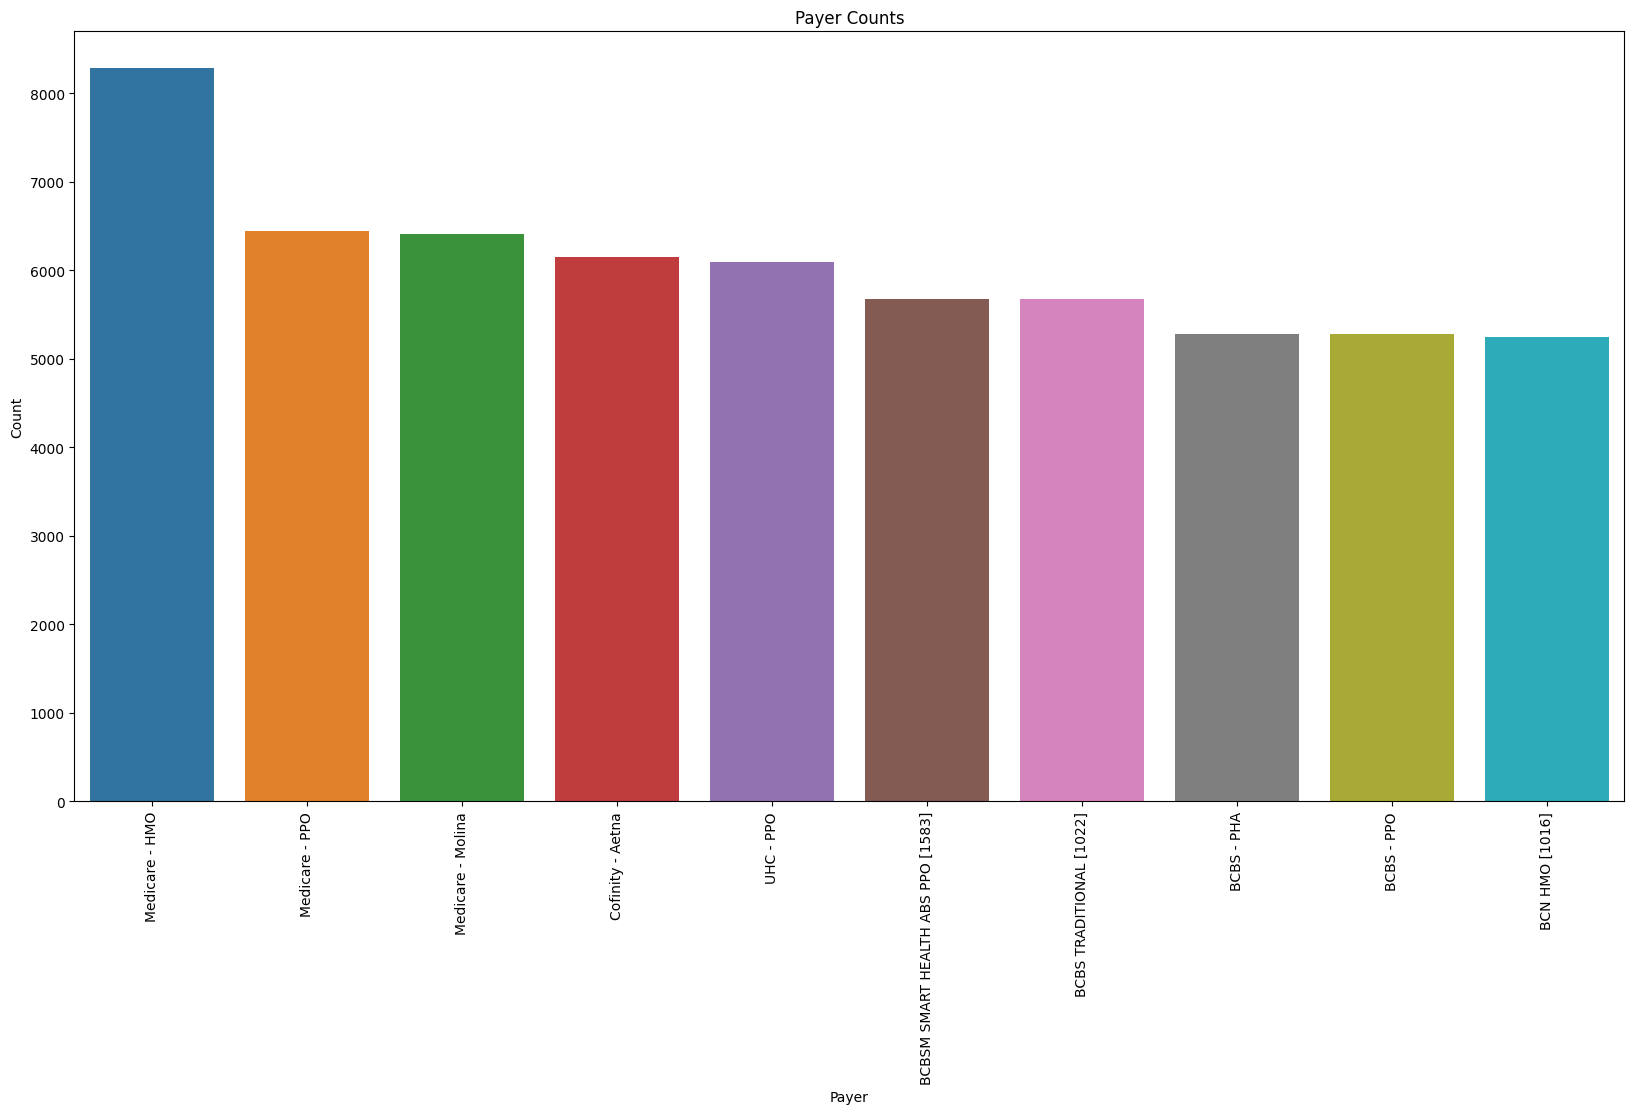

In [57]:
payer_counts = df[["payer", "cert_num"]].value_counts("payer").reset_index()
payer_counts = payer_counts[~payer_counts["payer"].str.contains("CASH PRICE|GROSS CHARGE")]
payer_counts = payer_counts.head(10)
plt.figure(figsize=(20,10))
sns.barplot(x="payer", y="count", data=payer_counts, hue = "payer")
plt.xlabel("Payer")
plt.ylabel("Count")
plt.title("Payer Counts")
plt.xticks(rotation=90)
plt.show()
#change color of each payer

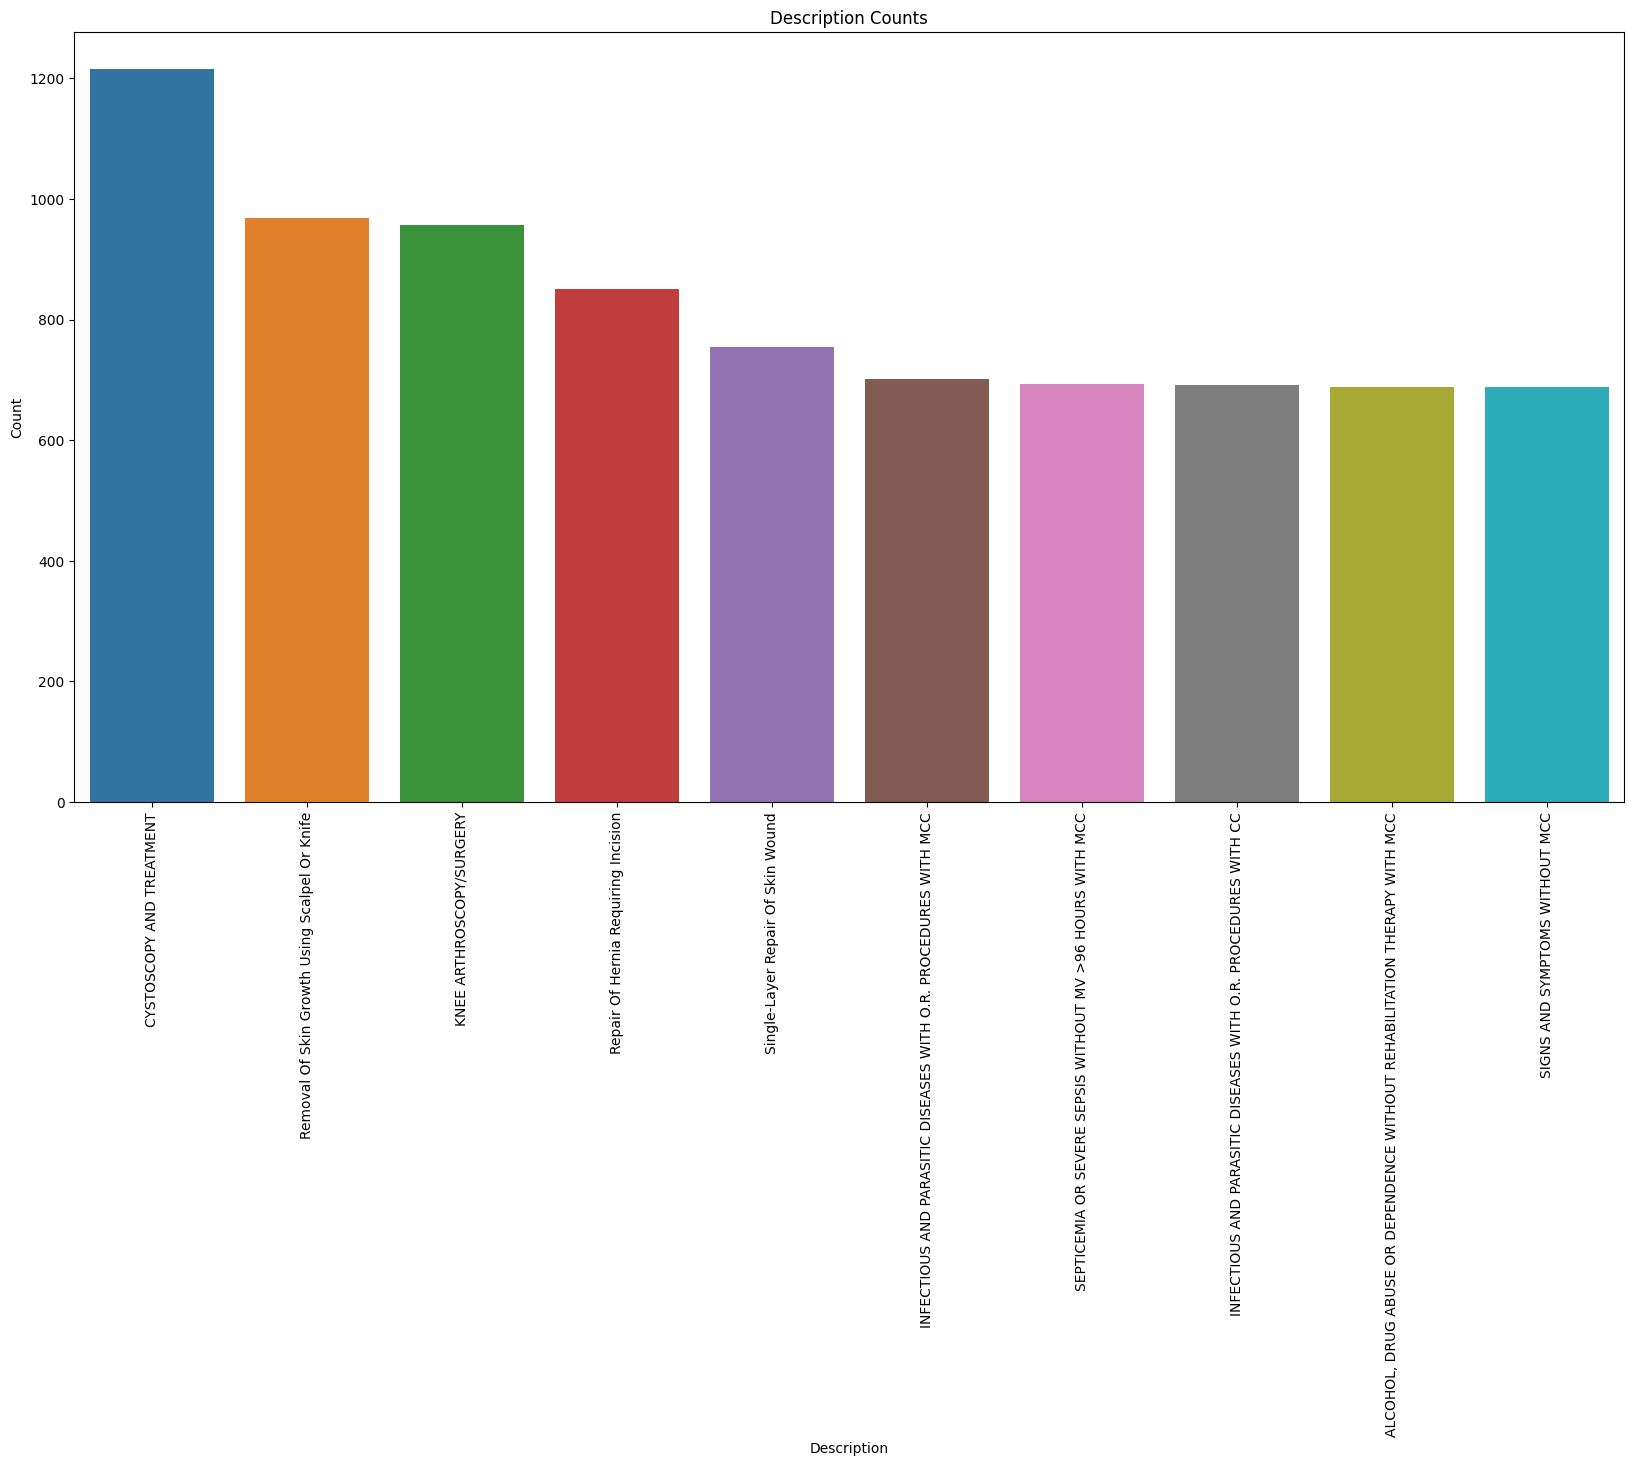

In [55]:
desc_counts = df[["description"]].value_counts("description").reset_index()
desc_counts = desc_counts.head(10)
#desc_counts.plot(x="description", y="count", kind="bar", ylabel= "Numer of Descriptions", xlabel = "Description", title = "Description Counts")
plt.figure(figsize=(20,10))
sns.barplot(x="description", y="count", data=desc_counts, hue = "description")
plt.xlabel("Description")
plt.ylabel("Count")
plt.title("Description Counts")
plt.xticks(rotation=90)
plt.show()

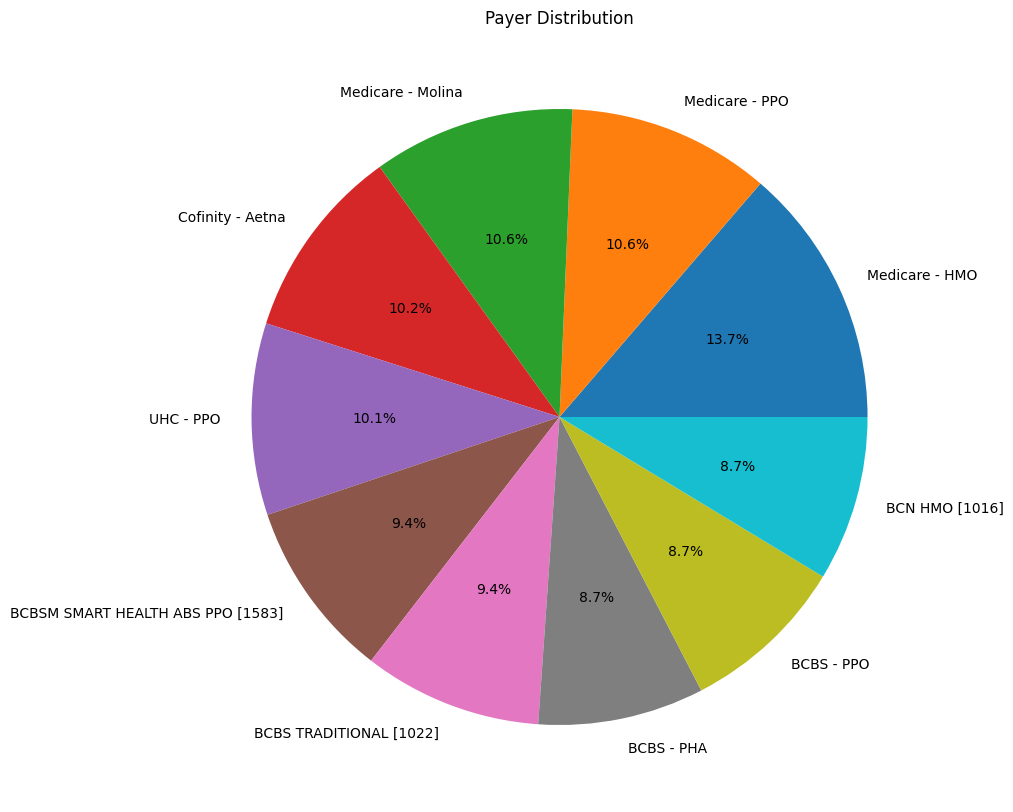

In [46]:
plt.figure(figsize=(30,10))
plt.pie(payer_counts["count"], labels=payer_counts["payer"], autopct='%1.1f%%')
plt.title("Payer Distribution")
plt.show()

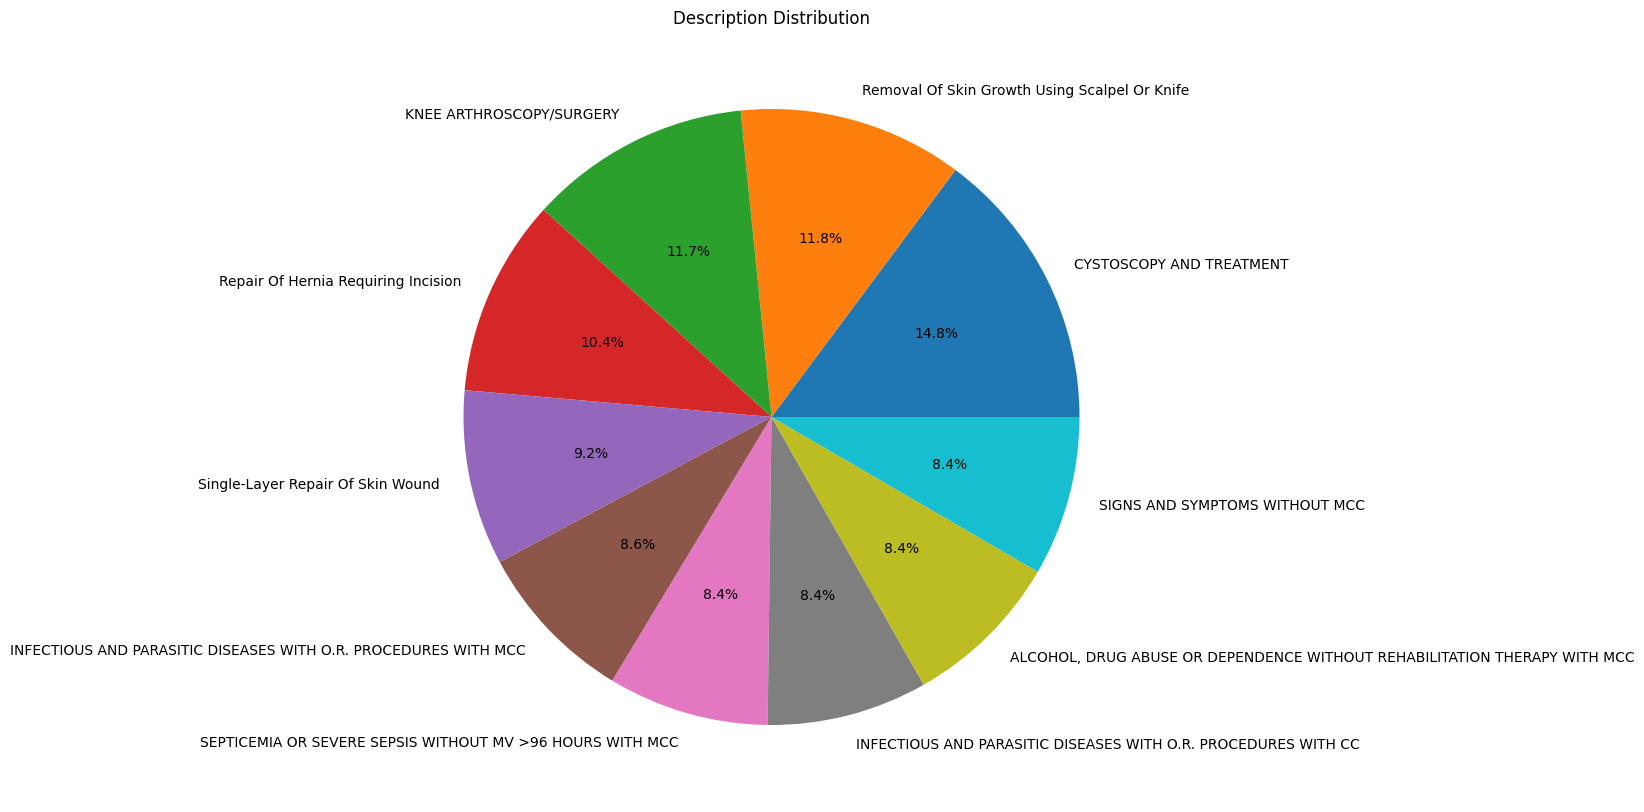

In [48]:
plt.figure(figsize=(30,10))
plt.pie(desc_counts["count"], labels=desc_counts["description"], autopct='%1.1f%%')
plt.title("Description Distribution")
plt.show()

In [30]:
# prompt: remove rows from payer_counts that contain CASH PRICE or GROSS CHARGE
payer_counts = payer_counts[~payer_counts["payer"].str.contains("CASH PRICE|GROSS CHARGE")]
payer_counts

,payer,count
2,Medicare - HMO,8285
3,Medicare - PPO,6443
4,Medicare - Molina,6411
5,Cofinity - Aetna,6147
6,UHC - PPO,6091
...,...,...
808,MERIDIAN MEDICARE ADVANTAGE,2
809,AETNA 210120 210120 AETNA BET HLT MI CAID HMP 630,2
810,AETNA 210109 210109 AETNA BETTER HLTH MI CAID 630,2
811,AETNA MICHIGAN PREFERRED210 AETNA MICHIGAN PRE...,1


In [17]:
baseline_df = df.merge(desc_clusters, on="description", how="inner")
baseline_df.head()

,cert_num,name,address,city,state,zip5,beds,payer,internal_revenue_code,description,...,BCBS,Medicare,Medicaid,UHC,Aetna,Cigna,Cash Price,Gross Charge,HospitalInsurance,birch_cluster
0,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,NONE,Removal of Pilonidal Cyst,...,0,0,0,0,0,0,1,0,0,70134
1,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,NONE,Removal of Pilonidal Cyst,...,0,0,0,0,0,0,0,1,0,70134
2,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,NONE,Removal of Pilonidal Cyst,...,0,0,0,0,0,0,1,0,0,70134
3,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,GROSS CHARGE,NONE,Removal of Pilonidal Cyst,...,0,0,0,0,0,0,0,1,0,70134
4,230005,PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,5640 N ADRIAN HIGHWAY,ADRIAN,MI,49221,88,CASH PRICE,NONE,Removal of Breast Growth Requiring Incision,...,0,0,0,0,0,0,1,0,0,70079


In [16]:
#baseline metrics
train_df = pd.read_csv(folder_path + "train_df_name_enc.csv")
train_df.head()

,zip5,beds,price,BCBS,Medicare,Medicaid,UHC,Aetna,Cigna,Cash Price,...,name_PAUL OLIVER MEMORIAL HOSPITAL,name_PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,name_PROMEDICA COLDWATER REGIONAL HOSPITAL,name_SINAI-GRACE HOSPITAL,name_UP HEALTH SYSTEM - MARQUETTE,name_UP HEALTH SYSTEM PORTAGE,name_VIBRA HOSPITAL OF SOUTHEASTERN MI-TAYLOR CAMPUS,inoutpatient_INPATIENT,inoutpatient_OUTPATIENT,inoutpatient_UNSPECIFIED
0,49007,380,195.70,0,0,1,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
1,49007,380,450.48,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,49007,380,375.16,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,49007,380,1769.16,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
4,49007,380,1769.16,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [20]:
global_train_mean = train_df["price"].mean()
global_train_median = train_df["price"].median()

In [17]:
test_df = pd.read_csv(folder_path + "test_df_name_enc.csv")
test_df.head()

,zip5,beds,price,BCBS,Medicare,Medicaid,UHC,Aetna,Cigna,Cash Price,...,name_PAUL OLIVER MEMORIAL HOSPITAL,name_PROMEDICA CHARLES AND VIRGINIA HICKMAN HOSPITAL,name_PROMEDICA COLDWATER REGIONAL HOSPITAL,name_SINAI-GRACE HOSPITAL,name_UP HEALTH SYSTEM - MARQUETTE,name_UP HEALTH SYSTEM PORTAGE,name_VIBRA HOSPITAL OF SOUTHEASTERN MI-TAYLOR CAMPUS,inoutpatient_INPATIENT,inoutpatient_OUTPATIENT,inoutpatient_UNSPECIFIED
0,49221,88,14266.79,0,0,0,0,0,0,1,...,False,True,False,False,False,False,False,False,True,False
1,49221,88,21948.91,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
2,49221,88,14266.79,0,0,0,0,0,0,1,...,False,True,False,False,False,False,False,False,True,False
3,49221,88,21948.91,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
4,49221,88,15849.42,0,0,0,0,0,0,1,...,False,True,False,False,False,False,False,False,True,False


In [28]:
test_df_price = test_df["price"]
rmse = np.sqrt(np.mean((test_df_price - global_train_mean)**2))
print("Global RMSE:", rmse)

Global RMSE: 24284.301765826178


In [32]:
train_df_cluster = train_df.groupby("birch_cluster")["price"].mean().reset_index()
train_df_cluster.rename(columns={"price": "cluster_mean"}, inplace=True)
train_df_cluster.head()

,birch_cluster,cluster_mean
0,37,3536.856842
1,54,3283.967709
2,285,3088.128229
3,291,6008.736452
4,294,3008.885484


In [37]:
test_df_cluster = test_df[["price", "birch_cluster"]]
test_df_cluster.head()

,price,birch_cluster
0,14266.79,70134
1,21948.91,70134
2,14266.79,70134
3,21948.91,70134
4,15849.42,70079


In [38]:
test_df_cluster = test_df_cluster.merge(train_df_cluster, on="birch_cluster", how="left")
test_df_cluster.head()

,price,birch_cluster,cluster_mean
0,14266.79,70134,4416.457035
1,21948.91,70134,4416.457035
2,14266.79,70134,4416.457035
3,21948.91,70134,4416.457035
4,15849.42,70079,3973.701158


In [39]:
test_df_cluster["cluster_mean"].fillna(global_train_mean, inplace=True)
test_df_cluster.head()

<ipython-input-39-f34d24085ee6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df_cluster["cluster_mean"].fillna(global_train_mean, inplace=True)


,price,birch_cluster,cluster_mean
0,14266.79,70134,4416.457035
1,21948.91,70134,4416.457035
2,14266.79,70134,4416.457035
3,21948.91,70134,4416.457035
4,15849.42,70079,3973.701158


In [40]:
cluster_rmse = np.sqrt(np.mean((test_df_cluster["price"] - test_df_cluster["cluster_mean"])**2))
print("Cluster RMSE:", cluster_rmse)

Cluster RMSE: 17126.034134284382


In [42]:
baseline_results_df = pd.DataFrame({"Model": ["Global Mean", "Cluster Mean"], "RMSE": [rmse, cluster_rmse]})
baseline_results_df
baseline_results_df.to_csv(folder_path + "baseline_results.csv", index=False)

In [ ]:
gross_train = train_df[train_df["Gross Charge"] != 1]
print(gross_train.shape)
gross_df[["gross_price", "birch_cluster"]]
train_df.merge(gross_df[["gross_price", "birch_cluster"]], on=["birch_cluster"], how="left")

(465075, 887)


In [ ]:
# Import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Michigan Zip Code Shapefile
# You can download the Zip Code Tabulation Areas (ZCTAs) shapefile from the US Census Bureau:
# https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html

# For this example, we'll assume you've downloaded the 2020 ZCTA shapefile and it's stored locally.
# Adjust the file paths to where you've saved the shapefiles.

# Load the ZCTA shapefile (zip code areas)
zcta_shapefile = 'path_to_shapefile/tl_2020_us_zcta510.shp'
zctas = gpd.read_file(zcta_shapefile)

# Step 2: Load the Michigan State Boundary Shapefile
# Download state boundaries from the same Census source or use a pre-existing shapefile.

state_shapefile = 'path_to_shapefile/cb_2020_us_state_500k.shp'
states = gpd.read_file(state_shapefile)

# Filter for Michigan
michigan = states[states['STUSPS'] == 'MI']

# Ensure both datasets use the same coordinate reference system (CRS)
zctas = zctas.to_crs(michigan.crs)

# Step 3: Clip ZCTAs to Michigan State Boundary
# This will give us only the zip codes within Michigan.

mi_zctas = gpd.overlay(zctas, michigan, how='intersection')

# Step 4: Load Health Insurance Rate Data
# Assuming you have a CSV file with columns 'zip_code' and 'health_insurance_rate'

health_data = pd.read_csv('path_to_data/health_insurance_rates.csv')

# Ensure zip codes are strings and zero-padded to 5 digits
health_data['zip_code'] = health_data['zip_code'].astype(str).str.zfill(5)

# Step 5: Merge Health Data with Zip Code Geometries
# Rename the ZCTA column to 'zip_code' for merging

mi_zctas = mi_zctas.rename(columns={'ZCTA5CE10': 'zip_code'})
mi_zctas['zip_code'] = mi_zctas['zip_code'].astype(str)

# Merge the geodataframe with the health insurance data
mi_zctas = mi_zctas.merge(health_data, on='zip_code', how='left')

# Step 6: Create the Visualization
# Plot the map using the 'health_insurance_rate' column

# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the data
mi_zctas.plot(
    column='health_insurance_rate',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'label': "Health Insurance Rate (%)",
        'orientation': "horizontal"
    }
)

# Add title and remove axis
ax.set_title('Health Insurance Rate by Zip Code in Michigan', fontsize=16)
ax.axis('off')

# Show the plot
plt.show()
